Computation Time

In [2]:
import time
import os
import torch
import torch.nn as nn
from PIL import Image
import random
import csv
from torchvision import transforms, models

dataset_path = r"C:\Users\dhani\Documents\Tugas Akhir and Stuff\Data"
# model_weights_path = r"C:\Users\dhani\Documents\Tugas Akhir and Stuff\Val Code\resnet34_ZeroLayer_manual.pth"
# model_weights_path = r"C:\Users\dhani\Documents\Tugas Akhir and Stuff\Val Code\resnet50_ZeroLayer.pth"
model_weights_path = r"C:\Users\dhani\Documents\Tugas Akhir and Stuff\Val Code\resnet101_ZeroLayer.pth"

# Konfigurasi perangkat
device = torch.device("cuda")
# device = torch.device("cpu")

# Load model ResNet101
num_classes = 52
model = models.resnet101(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load(model_weights_path, map_location=device))
model = model.to(device)

# Fungsi memproses gambar
def process_image(image_path, model, device):
    start_time = time.time()
    image = Image.open(image_path)
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    model.eval()
    with torch.no_grad():
        image_tensor = transform(image).unsqueeze(0).to(device)
        model(image_tensor)
    elapsed_time = time.time() - start_time
    return image_path, elapsed_time

# Mendapatkan nama kelas dari folder dataset
def get_class_names(dataset_path):
    return sorted(os.listdir(dataset_path))

class_names = get_class_names(dataset_path)

# Memilih gambar acak dari folder dataset
def select_random_image_from_directory(dataset_path):
    class_name = random.choice(class_names)
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        image_name = random.choice([img for img in os.listdir(class_folder) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
        return os.path.join(class_folder, image_name)
    return None

# Memilih beberapa gambar acak
def select_random_images(dataset_path, num_images=100):
    images = []
    for _ in range(num_images):
        image_path = select_random_image_from_directory(dataset_path)
        if image_path:
            images.append(image_path)
    return images

# Proses gambar dan simpan hasil dalam CSV
random_images = select_random_images(dataset_path, num_images=100)
csv_filename = "computetime_101_0_cuda.csv"
with open(csv_filename, mode='w', newline='') as csv_file:
    fieldnames = ['Image Path', 'Computation Time (s)']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

    total_time = 0
    for image_path in random_images:
        print(f"Processing random image: {image_path}")
        image_path, elapsed_time = process_image(image_path, model, device)
        writer.writerow({'Image Path': image_path, 'Computation Time (s)': elapsed_time})
        total_time += elapsed_time

    average_time = total_time / len(random_images)
    print(f"Average computation time for all 100 images: {average_time:.4f} seconds")


C:\Users\dhani\AppData\Local\Temp\ipykernel_4084\963565357.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_weights_path, map_loca

Processing random image: C:\Users\dhani\Documents\Tugas Akhir and Stuff\Data\Acalypha siamensis Oliv. ex Gage\IMG_20241109_133211.jpg
Processing random image: C:\Users\dhani\Documents\Tugas Akhir and Stuff\Data\Cocos nucifera L\IMG_20241109_135508.jpg
Processing random image: C:\Users\dhani\Documents\Tugas Akhir and Stuff\Data\Strombosia ceylanica Gardn\IMG_20241106_103347.jpg
Processing random image: C:\Users\dhani\Documents\Tugas Akhir and Stuff\Data\Excoecaria cochinchinensis Lour\IMG_20241125_103959.jpg
Processing random image: C:\Users\dhani\Documents\Tugas Akhir and Stuff\Data\Pandanus amaryllifolius Roxb\IMG_20241109_141519_1.jpg
Processing random image: C:\Users\dhani\Documents\Tugas Akhir and Stuff\Data\Hopea pedicellata (Brandis) Symington\IMG_20241125_090448.jpg
Processing random image: C:\Users\dhani\Documents\Tugas Akhir and Stuff\Data\Vatica umbonata Burck\IMG_20241125_090920.jpg
Processing random image: C:\Users\dhani\Documents\Tugas Akhir and Stuff\Data\Alstonia angusti

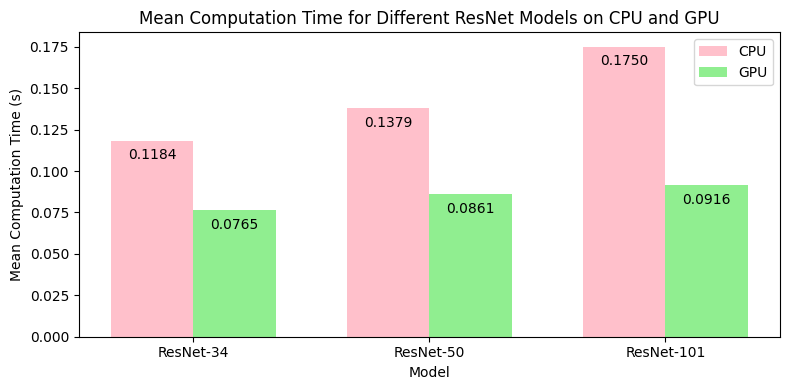

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['ResNet-34', 'ResNet-50', 'ResNet-101']
cpu_times = [0.1184, 0.1379, 0.175]
cuda_times = [0.0765, 0.0861, 0.0916]

# Set positions for the bars
x = np.arange(len(models))

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Bar width
width = 0.35

# Plot the bars for CPU and CUDA
bars_cpu = ax.bar(x - width/2, cpu_times, width, label='CPU', color='pink')
bars_cuda = ax.bar(x + width/2, cuda_times, width, label='GPU', color='lightgreen')

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Mean Computation Time (s)')
ax.set_title('Mean Computation Time for Different ResNet Models on CPU and GPU')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Annotate bars with computation times
for bar in bars_cpu:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, height - 0.013,
        f'{height:.4f}',
        ha='center', va='bottom'
    )

for bar in bars_cuda:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, height - 0.013,
        f'{height:.4f}',
        ha='center', va='bottom'
    )

# Display the plot
plt.tight_layout()
plt.show()


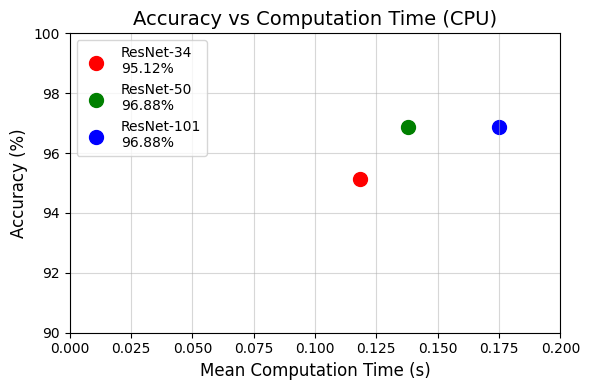

In [3]:
import matplotlib.pyplot as plt

# Data
models = ["ResNet-34\n95.12%", "ResNet-50\n96.88%", "ResNet-101\n96.88%"]
mean_time = [0.1184, 0.1379, 0.175]  # in seconds
accuracy = [95.12, 96.88, 96.88]  # in percentage
colors = ['red', 'green', 'blue']  # Assign different colors for each point

# Scatter plot with axes starting at 0
plt.figure(figsize=(6, 4))

# Plot points with different colors
for i in range(len(models)):
    plt.scatter(mean_time[i], accuracy[i], color=colors[i], s=100, label=models[i])

# Annotate points with model names
# for i, model in enumerate(models):
#     plt.text(mean_time[i] + 0.001, accuracy[i] - 0.5, model, fontsize=10, color='black')

# Axis labels and title
plt.xlabel('Mean Computation Time (s)', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Accuracy vs Computation Time (CPU)', fontsize=14)

# Adjust axis start
plt.xlim(0, 0.2)
plt.ylim(90, 100)

# Add grid and legend
plt.grid(alpha=0.5)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


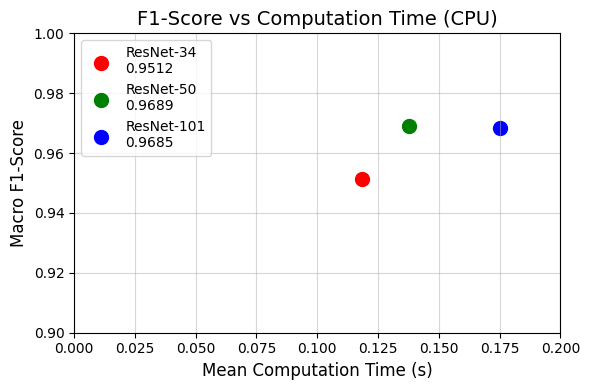

In [6]:
import matplotlib.pyplot as plt

# Data
models = ["ResNet-34\n0.9512", "ResNet-50\n0.9689", "ResNet-101\n0.9685"]
mean_time = [0.1184, 0.1379, 0.175]  # in seconds
f1_score = [0.9512, 0.9689, 0.9685]  # Macro F1-Score
colors = ['red', 'green', 'blue']  # Assign different colors for each point

# Scatter plot with axes starting at 0
plt.figure(figsize=(6, 4))

# Plot points with different colors
for i in range(len(models)):
    plt.scatter(mean_time[i], f1_score[i], color=colors[i], s=100, label=models[i])

# Annotate points with model names
# for i, model in enumerate(models):
#     plt.text(mean_time[i] + 0.001, f1_score[i] - 0.005, model, fontsize=10, color='black')

# Axis labels and title
plt.xlabel('Mean Computation Time (s)', fontsize=12)
plt.ylabel('Macro F1-Score', fontsize=12)
plt.title('F1-Score vs Computation Time (CPU)', fontsize=14)

# Adjust axis start
plt.xlim(0, 0.2)
plt.ylim(0.9, 1)

# Add grid and legend
plt.grid(alpha=0.5)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


GPU

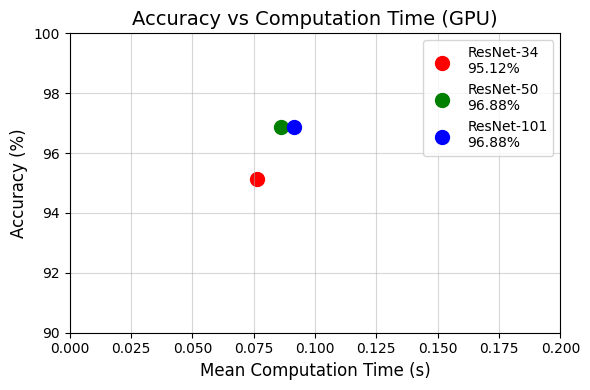

In [11]:
import matplotlib.pyplot as plt

# Data
models = ["ResNet-34\n95.12%", "ResNet-50\n96.88%", "ResNet-101\n96.88%"]
mean_time = [0.0765, 0.0861, 0.0916]  # in seconds
accuracy = [95.12, 96.88, 96.88]  # in percentage
colors = ['red', 'green', 'blue']  # Assign different colors for each point

# Scatter plot with axes starting at 0
plt.figure(figsize=(6, 4))

# Plot points with different colors
for i in range(len(models)):
    plt.scatter(mean_time[i], accuracy[i], color=colors[i], s=100, label=models[i])

# Annotate points with model names
# for i, model in enumerate(models):
#     plt.text(mean_time[i] + 0.001, accuracy[i] - 0.5, model, fontsize=10, color='black')

# Axis labels and title
plt.xlabel('Mean Computation Time (s)', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Accuracy vs Computation Time (GPU)', fontsize=14)

# Adjust axis start
plt.xlim(0, 0.2)
plt.ylim(90, 100)

# Add grid and legend
plt.grid(alpha=0.5)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


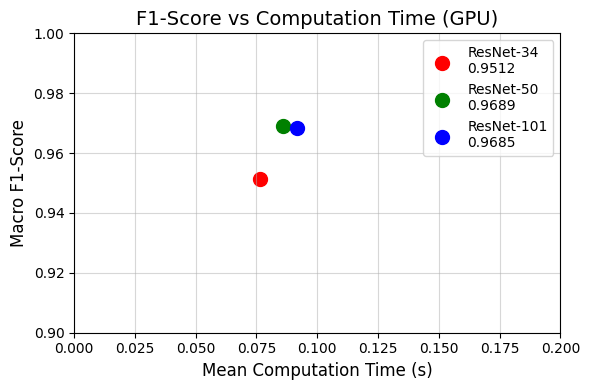

In [12]:
import matplotlib.pyplot as plt

# Data
models = ["ResNet-34\n0.9512", "ResNet-50\n0.9689", "ResNet-101\n0.9685"]
mean_time = [0.0765, 0.0861, 0.0916]  # in seconds
f1_score = [0.9512, 0.9689, 0.9685]  # Macro F1-Score
colors = ['red', 'green', 'blue']  # Assign different colors for each point

# Scatter plot with axes starting at 0
plt.figure(figsize=(6, 4))

# Plot points with different colors
for i in range(len(models)):
    plt.scatter(mean_time[i], f1_score[i], color=colors[i], s=100, label=models[i])

# Annotate points with model names
# for i, model in enumerate(models):
#     plt.text(mean_time[i] + 0.001, f1_score[i] - 0.005, model, fontsize=10, color='black')

# Axis labels and title
plt.xlabel('Mean Computation Time (s)', fontsize=12)
plt.ylabel('Macro F1-Score', fontsize=12)
plt.title('F1-Score vs Computation Time (GPU)', fontsize=14)

# Adjust axis start
plt.xlim(0, 0.2)
plt.ylim(0.9, 1)

# Add grid and legend
plt.grid(alpha=0.5)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
